# Práctico 7 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage import measure as sm
from scipy.signal import convolve2d
from scipy.stats import norm 
from skimage.measure import block_reduce

%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

In [3]:
from matplotlib import cm

def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

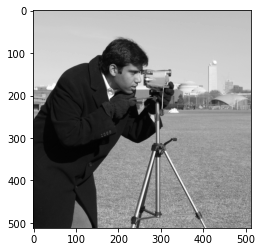

In [4]:
img = imageio.imread('imageio:camera.png')/255

plt.imshow(img, 'gray')

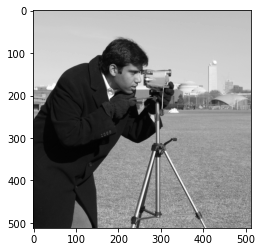

In [5]:
img44 = imageio.imread('imageio:camera.png')/255

plt.imshow(img, 'gray')

# Remuestreo, reconstrucción y cuantización

Para cada uno de los siguientes incisos, definir una función que haga las tareas especificadas sobre una imagen en escala de grises.

## 1. Upsampling / Downsampling x2

### 1.1. Definir una función que haga un downsampling x2 de la imagen de entrada utilizando los siguientes métodos:

1. Sampling cada 2 pixeles
2. Promedio de una cuadrícula de 2x2
3. Filtro gaussiano + sampling cada 2 pixeles

### 1.2. Definir una función que haga un upsampling x2 de la imagen de entrada utilizando los siguientes métodos:

1. Repetir pixeles en una grilla de 2x2
2. Interpolación bilineal
3. Interpolación bicúbica
4. Repetir pixeles en una grilla de 2x2 y aplicar filtro gaussiano

## 2. Upsampling / Downsampling arbitrario usando FFT

1. Upsampling: Calcular la transformada de Fourier de la imagen, agregar un padding de ceros alrededor del espectro para obtener el tamaño de imagen deseado y antitransformar el espectro con padding
2. Downsampling: Calcular la transformada de Fourier de la imagen, recortar los bordes del espectro al tamaño deseado y antitransformar el espectro recortado

## 3. Cuantización

Cuantizar los niveles de grises de la imagen utilizando los siguientes métodos:

1. Cuantización uniforme
2. Difusión del error por scanline
3. Dithering de Floyd-Steinberg

## 1.1. Downsampling

In [6]:
def  nn_downsampling_x2(img):
    
    out = img.copy()  
    down_sampled=out[0::2,0::2]
    
    return down_sampled


Text(0.5, 1.0, 'Downsampling_x2')

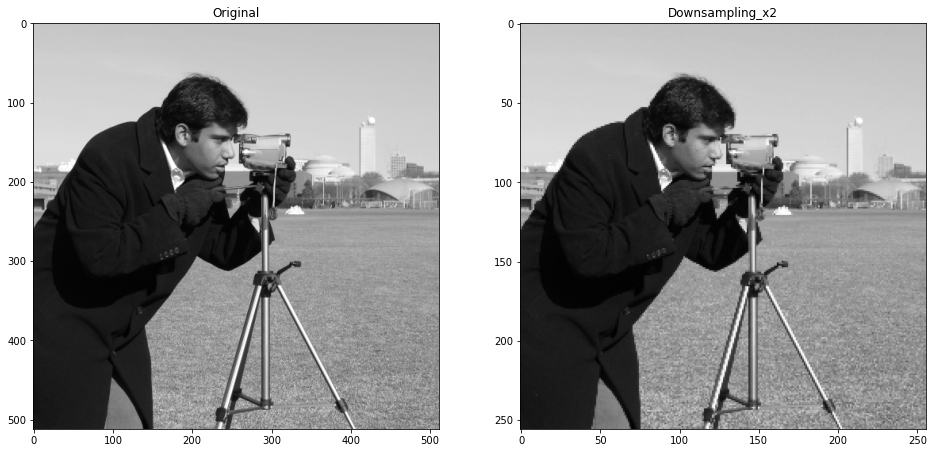

In [7]:
img_down_x2 = nn_downsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[0].set_title('Original')
axes[1].imshow(img_down_x2, 'gray')
axes[1].set_title('Downsampling_x2')

In [8]:
def avg_downsampling_x2(img):
   
    #N,M= img.shape
   # out= np.zeros(N//2)
    out = block_reduce(img, (2,2), np.mean)
    
    

    
    return out

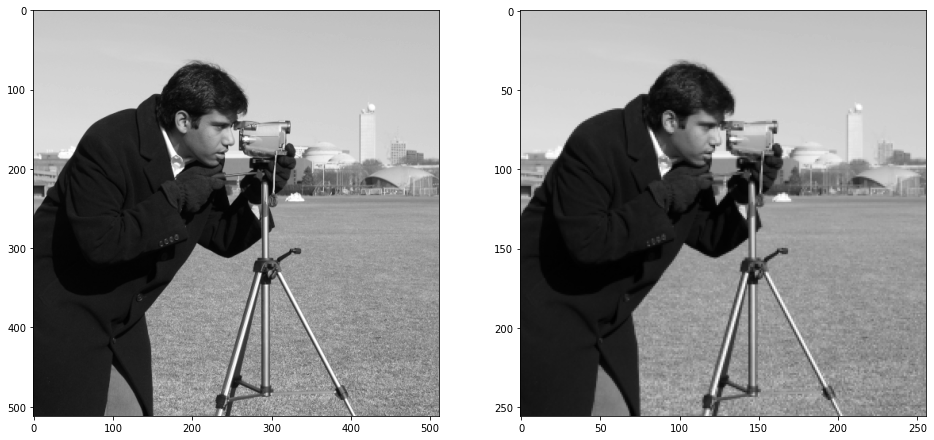

In [9]:

img2 = avg_downsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

In [10]:
def filter_Gaussian(N,std):
    out = np.arange(N)
    out = norm.pdf(out, (N-1)//2,std)
    out = np.outer(out,out)
    out /= out.sum()
    print (out)
    return out

In [11]:
def  gaussian_nn_downsampling_x2(img, N, std):
    
    out = img.copy()  
    k  = filter_Gaussian(N, std)
    k = filter_Gaussian(5,2)
    img_filt = convolve2d(img, k, 'same')
    
    down_sampled = img_filt[0::2,0::2]
    
    return down_sampled 

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


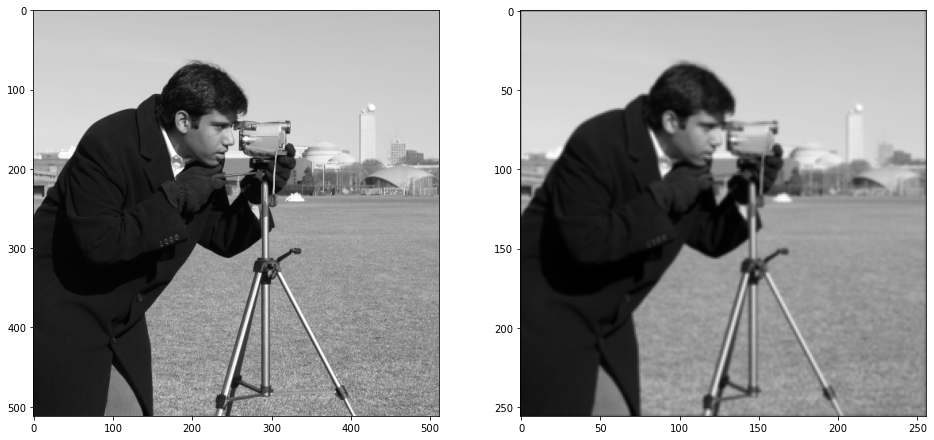

In [12]:
img2 = gaussian_nn_downsampling_x2(img,3,1)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

## 1.2. Upsampling

In [13]:
def nn_upsampling_x2(img):
    
    out = scipy.ndimage.zoom(img, 2, order=1)
    
    return out 

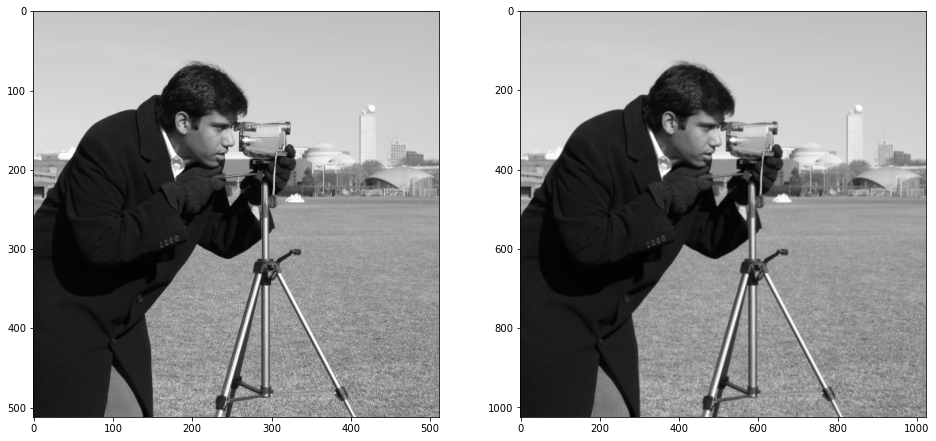

In [14]:
img3 = nn_upsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img3, 'gray')

In [15]:
def bilinear_upsampling_x2(img):
    out = scipy.ndimage.zoom(img, 2, order=2)
    return out 

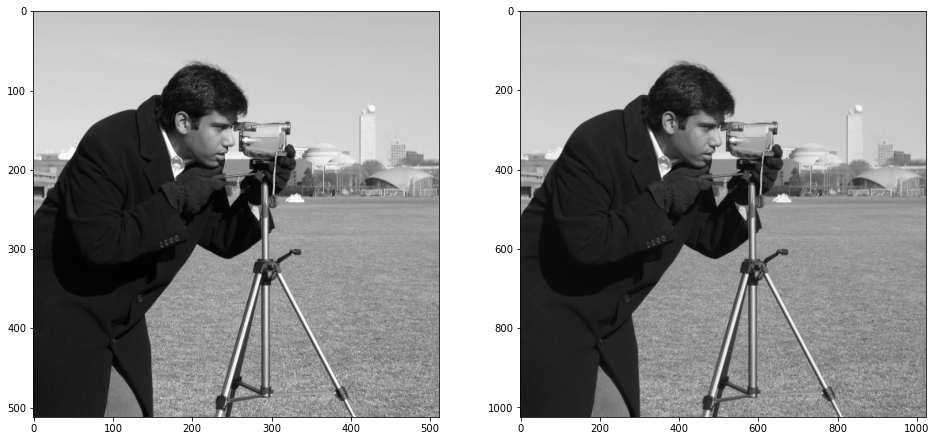

In [16]:
img2 = bilinear_upsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

In [17]:
def bicubic_upsampling_x2(img, kernel):
    
    xlen = img.shape[1]
    ylen = img.shape[0]
    imgx2 = np.zeros((ylen * 2 - ylen % 2, xlen * 2 - xlen % 2))  #accomodates both odd and even shapes
    imgx2[0::2,0::2] = img
    img_con = convolve2d(imgx2, kernel, 'same')
    
    return img_con

In [18]:
a = np.arange(9).reshape([3,3])  
xlen = a.shape[1]
ylen = a.shape[0]
b = np.zeros((ylen * 2 - ylen % 2, xlen * 2 - xlen % 2))  #accomodates both odd and even shapes
b[0::2,0::2] = a
print(b)

[[0. 0. 1. 0. 2.]
 [0. 0. 0. 0. 0.]
 [3. 0. 4. 0. 5.]
 [0. 0. 0. 0. 0.]
 [6. 0. 7. 0. 8.]]


In [19]:
k = np.array([-1/8, 0, 5/8, 1, 5/8, 0, -1/8])
kernel = np.outer(k,k)
kernel

array([[ 0.015625, -0.      , -0.078125, -0.125   , -0.078125, -0.      ,
         0.015625],
       [-0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        -0.      ],
       [-0.078125,  0.      ,  0.390625,  0.625   ,  0.390625,  0.      ,
        -0.078125],
       [-0.125   ,  0.      ,  0.625   ,  1.      ,  0.625   ,  0.      ,
        -0.125   ],
       [-0.078125,  0.      ,  0.390625,  0.625   ,  0.390625,  0.      ,
        -0.078125],
       [-0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        -0.      ],
       [ 0.015625, -0.      , -0.078125, -0.125   , -0.078125, -0.      ,
         0.015625]])

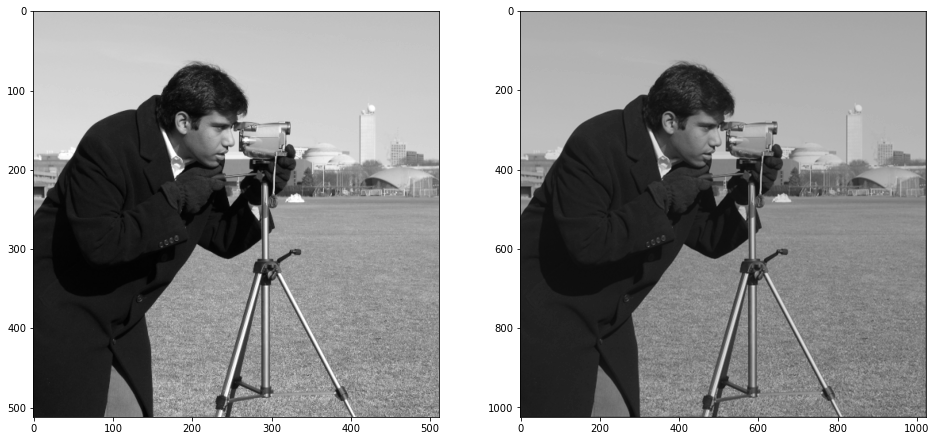

In [20]:
img3 = bicubic_upsampling_x2(img, kernel)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img3, 'gray')

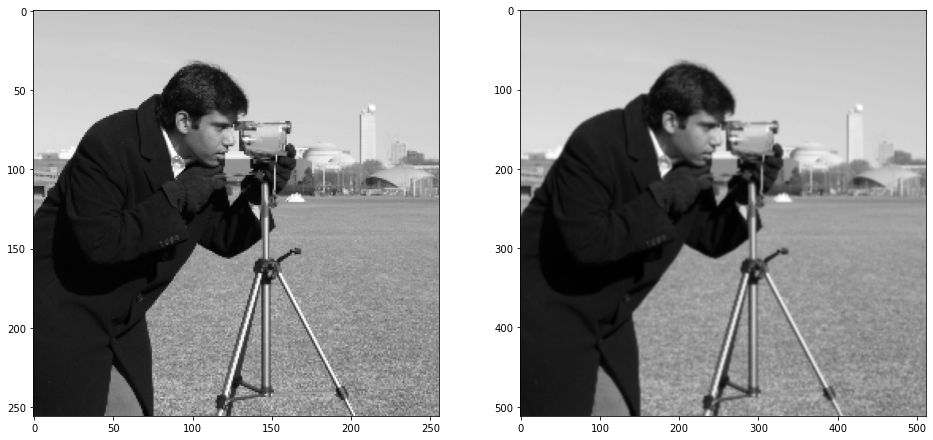

In [21]:
from skimage.filters import gaussian

img3 = nn_upsampling_x2(img_down_x2)
img3 = gaussian(img3, sigma=0.8, mode='reflect')

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img_down_x2, 'gray')
axes[1].imshow(img3, 'gray')

## 2. Downsampling/Upsampling usando FFT

In [53]:
def pad(img, new_shape): 
    
    N, M = img.shape
    Np1=abs(N-new_shape[0])//2
    Mp1=abs(M-new_shape[1])
    print(Np1)
    print(Mp1)
 
    top_pad =  Np1                      # padding simétrico
    botton_pad =  Np1
    right_pad =  Mp1
    left_pad = Mp1
     
        
    img=np.copy(np.pad(img,((top_pad,botton_pad),(left_pad, right_pad)), mode='constant', constant_values=0))
    N2, M2 = img.shape
    print(N2)
    print(M2) 
    cut_top =abs(N2-new_shape[0])//2
    cut_bottom = abs(N2-new_shape[0])//2
    cut_left = abs(M2-new_shape[1])//2
    cut_right =abs(M2-new_shape[1])//2
    
    if N > new_shape[0] or M > new_shape[1]:
        img = img [cut_top:-cut_bottom, cut_left:-cut_right]    # Recorté en el espectro de la imágen, por indexación de Numpy 
    N3, M3 = img.shape     
   # print(N3)
    #print(M3) 
        
    return img

In [54]:
def fft_resampling (img, new_shape):
    
    N,M = img.shape
    img_espectro = np.fft.fft2(img) / (N * M)      # Pasando al espacio K
    img_espectro = np.fft.fftshift(img_espectro)
     
    img_espectro_pd = pad(img_espectro, new_shape) # Padding en el espectro de la imágen 
    
    
        
        
    img_espectro_ = img_espectro_pd.reshape(new_shape[0], new_shape[1]) # RE-ESCALAMIENTO
 


    img_espectro_r = np.fft.ifftshift(img_espectro_) # reconstruyendo
    img_espectro_r = np.fft.ifft2(img_espectro_r) * (new_shape[0] * new_shape[1])
    out = np.uint8(img_espectro_r.real*255)
    
    return out

In [55]:
N, M = img.shape
print(N,M)
new_shape = (img.shape[0]//2, img.shape[1]*2)

print(new_shape[0],new_shape[1])

512 512
256 1024


128
512
768
1536
256 1024


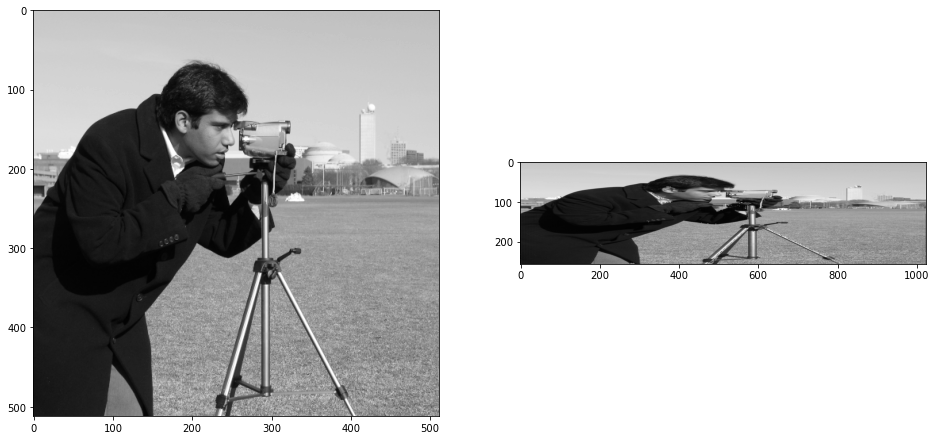

In [56]:
new_shape = (img.shape[0]//2, img.shape[1]*2)

img_up = fft_resampling(img, new_shape)
N, M = img_up.shape
print(img.shape[0]//2, img.shape[1]*2)
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_up, 'gray')

   ## 3. Cuantización

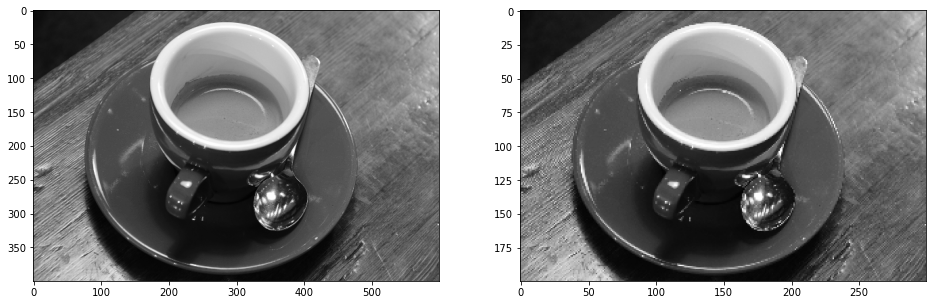

In [25]:
img = imageio.imread('imageio:coffee.png').mean(axis=2)/255
img_nn_d = nn_downsampling_x2(img)

levels = 4

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_nn_d, 'gray')

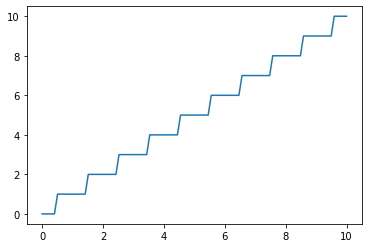

In [26]:
q = 2
x = np.linspace(0, 10, 100)
y =  np.rint(x*(q-1)) / (q-1)  # función de cuantificación 
plt.plot(x,y)
#CUANTIZACION DE LA IMAGEN: involucra la discretización de los valores de intensidades de la imagen. 

In [27]:
def cuantize_uniform(img, levels):   
    out = np.rint(img * levels-1) / (levels-1)     
    return out   

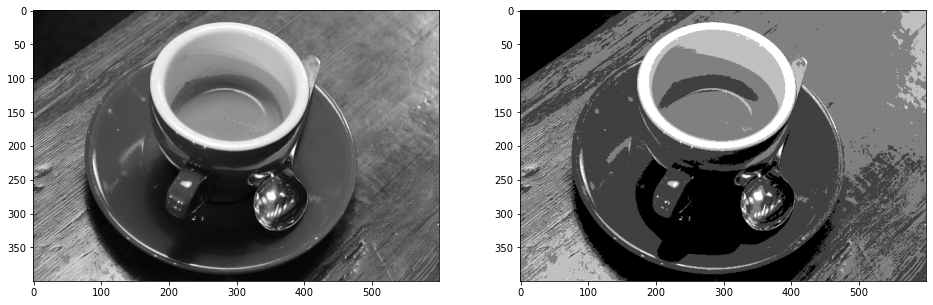

In [28]:
img_u = cuantize_uniform(img, 4)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_u, 'gray')

In [29]:
def cuantize_dithering_scanline(img, levels):
 
    M, N = img.shape
    img_out = np.zeros((M, N))
    
    error = 0
   
    for j in range(N):
        for i in range (M): 
            img_out [i][j] = np.round((img[i][j]-error) * (levels-1)) / (levels-1)
            error = error + img_out[i][j] - img[i][j]     
        


    return img_out

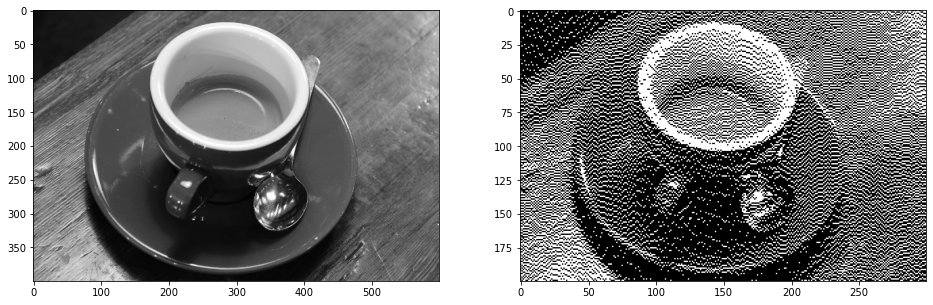

In [125]:
img_c_d_s = cuantize_dithering_scanline(img_nn_d, 2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_c_d_s, 'gray')

In [127]:

def cuantize_floyd_steinberg(im, levels):
    
    out=im.copy()
    N, M = out.shape
    err=0
    for ir in range(0,N-1):
        for ic in range(0,M-1):
            old_val = out[ir, ic]
            new_val = np.round(old_val * (levels-1)) / (levels-1)
            out[ir, ic] = new_val
            err = old_val - new_val
   
            if ic + 1 < M:
               out[ir, ic+1] += err * 7/16
            if (ir + 1 < N) and (ic + 1 < M):
                out[ir+1, ic-1] += err * 3/16
            if ir + 1 < N:   
                out[ir+1, ic] += err * 5/16
            if (ic - 1 >= 0) and (ir + 1 < N): 
                out[ir+1, ic+1] += err * 1/ 16
                               
    return out

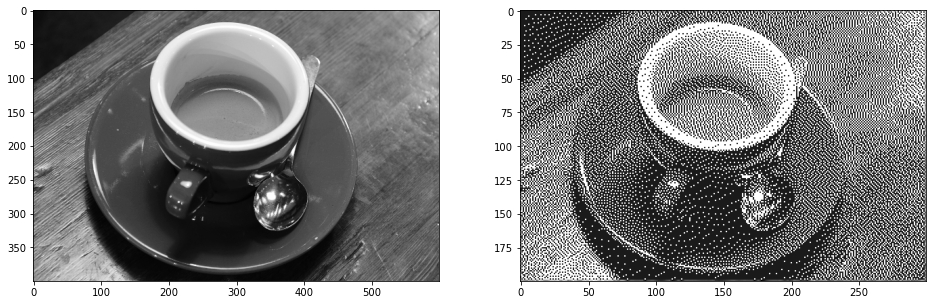

In [128]:
img_f_s = cuantize_floyd_steinberg(img_nn_d, 2)
            
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img_f_s, 'gray')